# Analyzation of Top Video Game Sales Across North America, Japan, and Globe

This project is meant to illustrate the sales of the highest selling video games in the North American market and the Japanese market. 
                                        

Code to import necessary libraries

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv

Code to create the database and load in the saved csv

In [2]:
con = sql.connect('games.db')

games = pd.read_csv('vgsales.csv')

games.to_sql('vgames', con, if_exists='replace')

Code to take the games database and reducing it down to any game that had sales of 1 million units or more. Also wanted to limit the four publishers to Nintendo, Microsoft Games Studios, Activision, and Electronic Arts as those were the main publishers of the database. 

In [3]:
results = pd.io.sql.execute("""
    DELETE FROM vgames
    WHERE 
       Global_Sales  < 1
       OR
       Publisher NOT IN('Nintendo', 'Microsoft Game Studios', 'Activision', 'Electronic Arts') 
""", con)
con.commit()

print('Deleted {} rows'.format(results.rowcount))

Deleted 15699 rows


In [4]:
pd.read_sql_query("""
    SELECT Name, Platform, Publisher, NA_Sales, JP_Sales, Global_Sales FROM vgames
    ORDER BY Global_Sales
    DESC;
""", con)

,Name,Platform,Publisher,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,Nintendo,41.49,3.77,82.74
1,Super Mario Bros.,NES,Nintendo,29.08,6.81,40.24
2,Mario Kart Wii,Wii,Nintendo,15.85,3.79,35.82
3,Wii Sports Resort,Wii,Nintendo,15.75,3.28,33.00
4,Pokemon Red/Pokemon Blue,GB,Nintendo,11.27,10.22,31.37
5,Tetris,GB,Nintendo,23.20,4.22,30.26
6,New Super Mario Bros.,DS,Nintendo,11.38,6.50,30.01
7,Wii Play,Wii,Nintendo,14.03,2.93,29.02
8,New Super Mario Bros. Wii,Wii,Nintendo,14.59,4.70,28.62
9,Duck Hunt,NES,Nintendo,26.93,0.28,28.31


In [5]:
company=pd.read_sql_query("""
    SELECT Publisher, Platform FROM vgames
""", con)

Using this data, I wanted to see which platform had the most games on this list. The results show that the Xbox 360 had the most games, followed closely by the Playstation 2. I found that particularly interesting because Nintendo, with their mutliple platforms took the first 14 spots in the overall sales of the top games. 

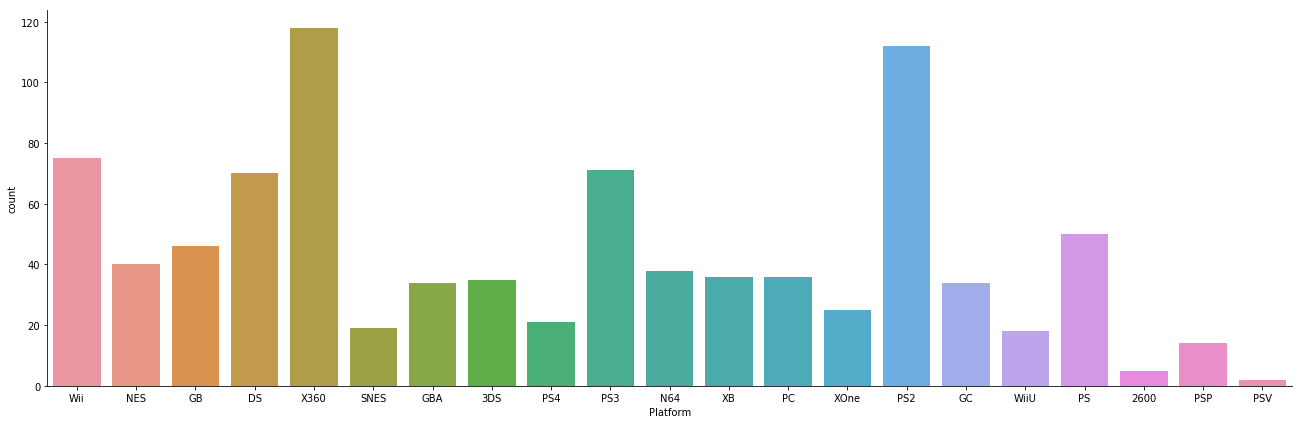

In [6]:
sns.catplot(
    x="Platform",
    data=company,
    kind="count",
    height=6,
    aspect=3
)

I also found it quite interesting that despite the Xbox 360 having the most games on the list, Microsoft Games Studios actually published the least number of top selling games. Nintendo takes that top spot, followed closely behind by Electronic Arts.

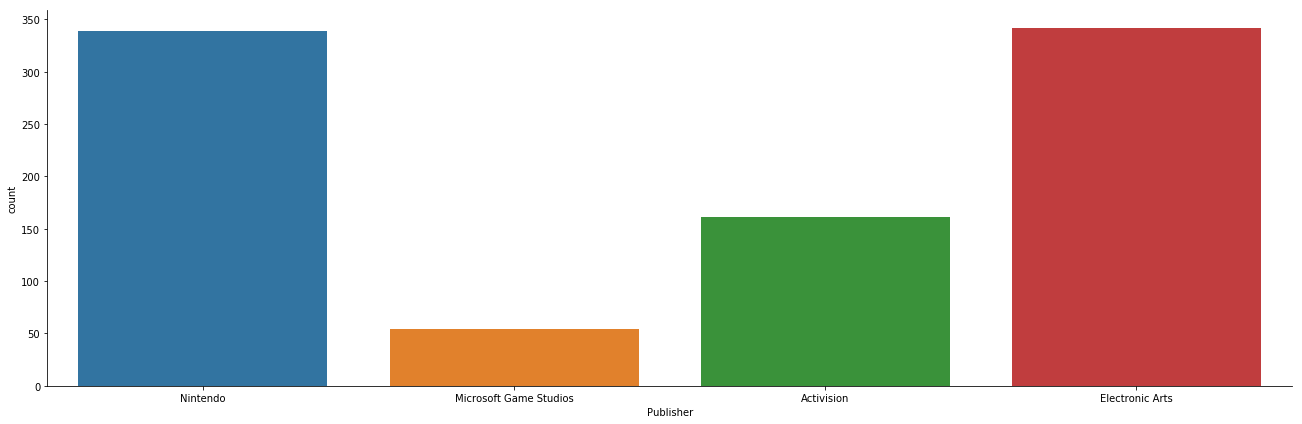

In [7]:
sns.catplot(
    x="Publisher",
    data=company,
    kind="count",
    height=6,
    aspect=3
)

Of the top 50 best selling games, I wanted to know which platforms were most represented. As expected, Nintendo consoles outshined the rest. Of the 11 platforms listed with the top 50 games, 8 were made by Nintendo. 

In [16]:
top_games=pd.read_sql_query("""
    SELECT Name, Platform FROM vgames
    LIMIT 50;
""", con)

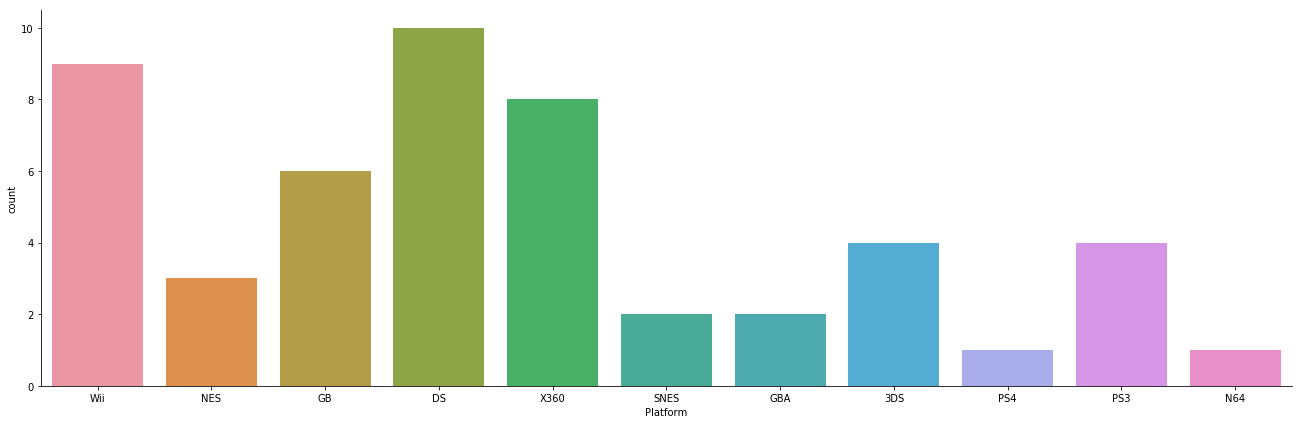

In [17]:
sns.catplot(
    x="Platform",
    data=top_games,
    kind="count",
    height=6,
    aspect=3
)